# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

19:56:46 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=251054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=710191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=243470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=592671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

19:56:47 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=210433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=198740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

19:56:48 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=481608;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=481165;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

19:56:49 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=544521;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=28286;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

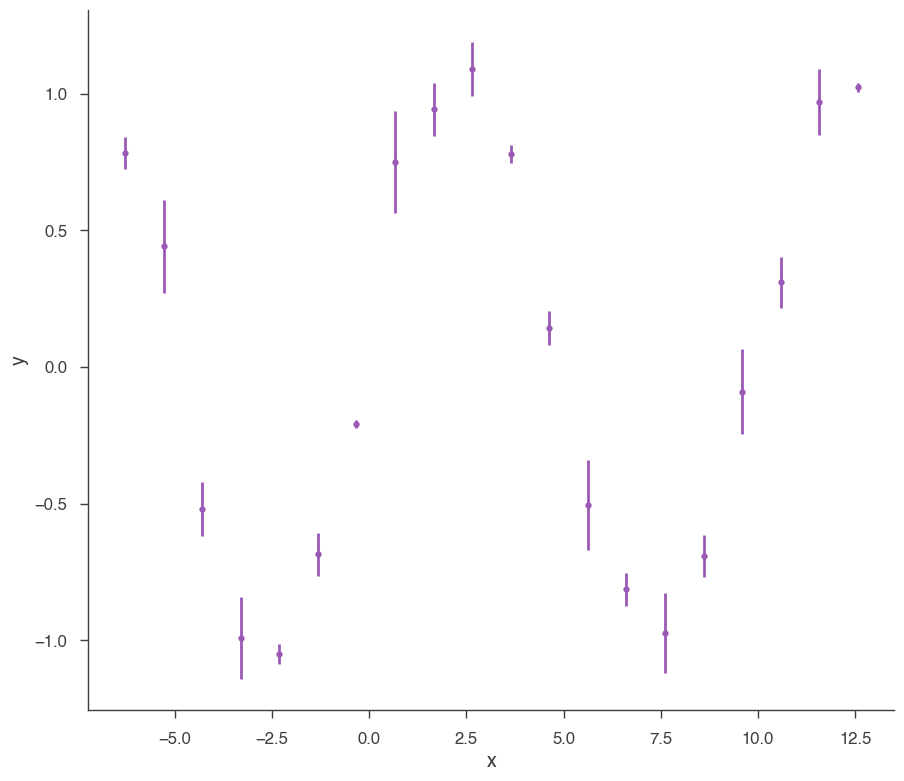

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=642625;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=928152;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

19:56:52 INFO      Mean acceptance fraction: 0.7120999999999998                                ]8;id=416060;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=377983;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=626222;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=520369;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=954209;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=616304;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.031 -0.011 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.010 -0.008 +0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.945754
total,-7.945754


Values of statistical measures:

,statistical measures
AIC,20.597390
BIC,21.882973
DIC,20.059948
PDIC,2.071302


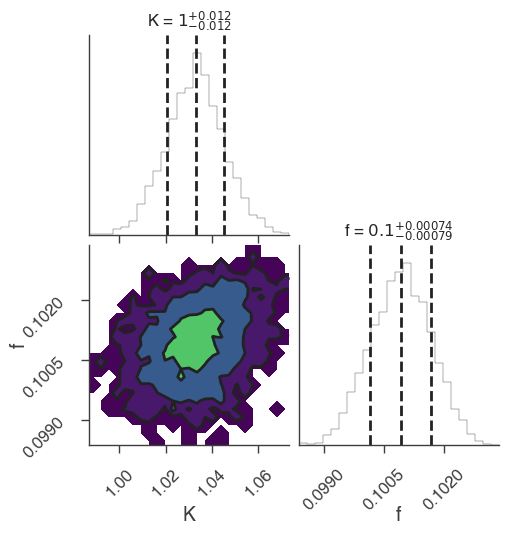

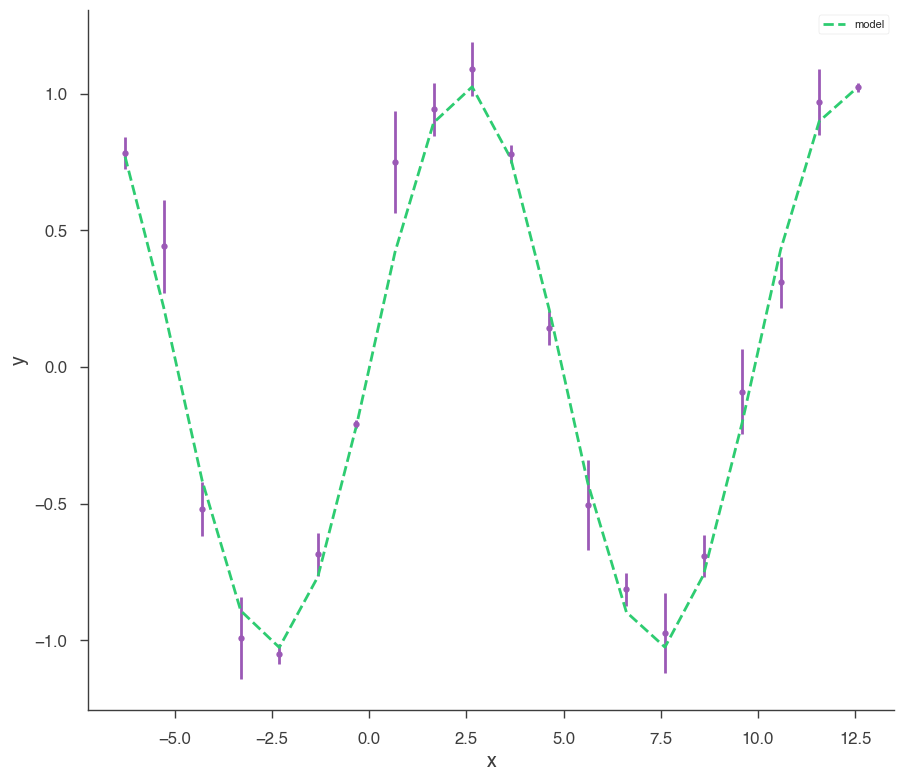

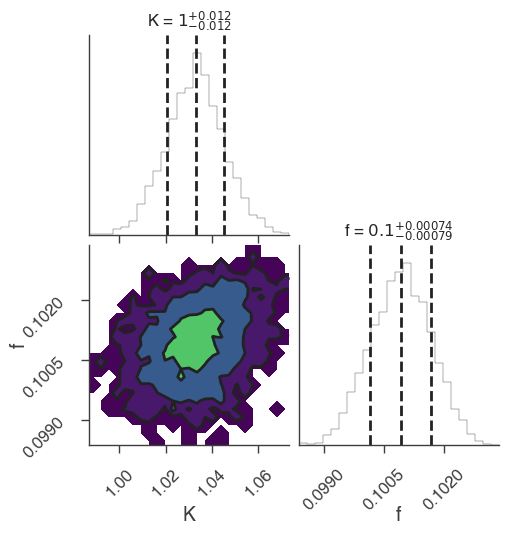

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

19:56:53 INFO      sampler set to multinest                                                ]8;id=419836;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=673364;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -16.771470786108747      +/-  0.13988085230230676     
 Total Likelihood Evaluations:         6757
 Sampling finished. Exiting MultiNest



19:56:54 INFO      fit restored to maximum of posterior                                         ]8;id=940791;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=366709;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=208731;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=994602;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.030 -0.012 +0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.009 +/- 0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.948909
total,-7.948909


Values of statistical measures:

,statistical measures
AIC,20.603701
BIC,21.889283
DIC,20.021964
PDIC,2.062595
log(Z),-7.283757


         INFO      deleting the chain directory chains                                     ]8;id=686595;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=597975;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

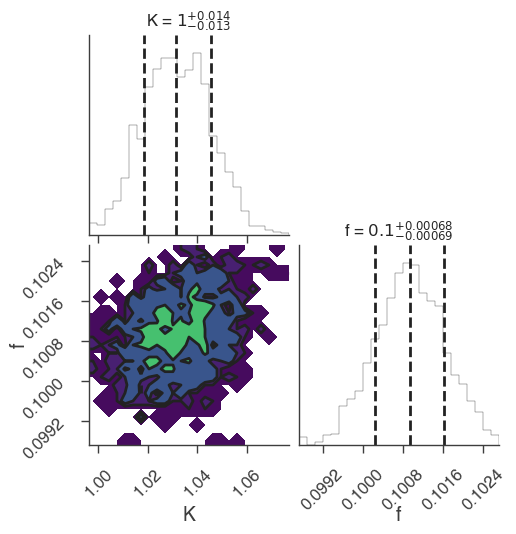

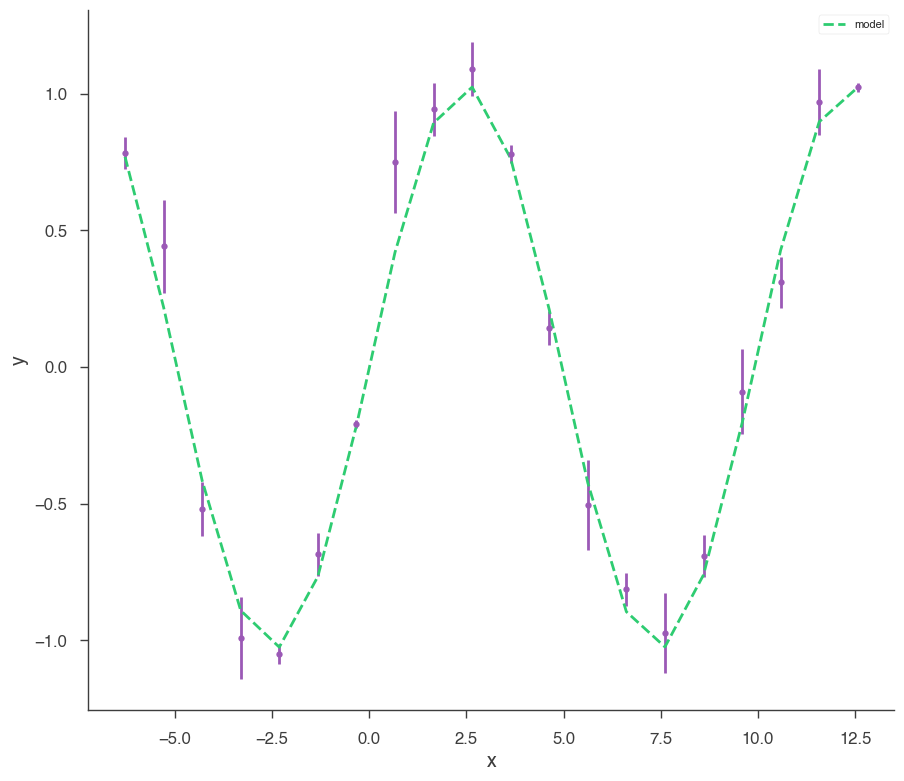

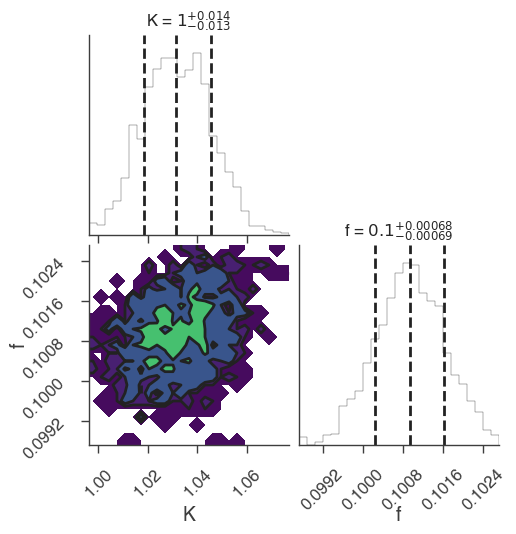

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

19:56:55 INFO      sampler set to dynesty_nested                                           ]8;id=728347;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=263562;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

235it [00:00, 2339.75it/s, bound: 0 | nc: 3 | ncall: 732 | eff(%): 32.104 | loglstar:   -inf < -4839.255 <    inf | logz: -4846.526 +/-  0.135 | dlogz: 4835.973 >  0.409]

469it [00:00, 1844.72it/s, bound: 0 | nc: 4 | ncall: 1364 | eff(%): 34.384 | loglstar:   -inf < -2914.885 <    inf | logz: -2921.919 +/-  0.130 | dlogz: 2905.752 >  0.409]

660it [00:00, 1636.06it/s, bound: 0 | nc: 1 | ncall: 2181 | eff(%): 30.261 | loglstar:   -inf < -2323.638 <    inf | logz: -2331.448 +/-  0.135 | dlogz: 2323.241 >  0.409]

828it [00:00, 1298.26it/s, bound: 0 | nc: 5 | ncall: 3380 | eff(%): 24.497 | loglstar:   -inf < -1971.743 <    inf | logz: -1980.147 +/-  0.137 | dlogz: 1971.494 >  0.409]

967it [00:00, 1016.35it/s, bound: 0 | nc: 1 | ncall: 4845 | eff(%): 19.959 | loglstar:   -inf < -1630.560 <    inf | logz: -1638.725 +/-  0.141 | dlogz: 1629.379 >  0.409]

1080it [00:01, 808.57it/s, bound: 0 | nc: 2 | ncall: 6688 | eff(%): 16.148 | loglstar:   -inf < -1417.462 <    inf | logz: -1426.075 +/-  0.143 | dlogz: 1416.549 >  0.409]

1171it [00:01, 720.16it/s, bound: 0 | nc: 19 | ncall: 8225 | eff(%): 14.237 | loglstar:   -inf < -996.781 <    inf | logz: -1005.580 +/-  0.144 | dlogz: 995.707 >  0.409] 

1250it [00:01, 590.37it/s, bound: 0 | nc: 4 | ncall: 10227 | eff(%): 12.223 | loglstar:   -inf < -806.438 <    inf | logz: -816.160 +/-  0.153 | dlogz: 807.719 >  0.409] 

1315it [00:01, 514.17it/s, bound: 0 | nc: 42 | ncall: 11877 | eff(%): 11.072 | loglstar:   -inf < -629.561 <    inf | logz: -638.583 +/-  0.147 | dlogz: 628.297 >  0.409]

1371it [00:01, 387.54it/s, bound: 1 | nc: 1 | ncall: 13604 | eff(%): 10.078 | loglstar:   -inf < -523.195 <    inf | logz: -532.738 +/-  0.148 | dlogz: 522.391 >  0.409] 

1550it [00:01, 618.60it/s, bound: 1 | nc: 2 | ncall: 13944 | eff(%): 11.116 | loglstar:   -inf < -305.183 <    inf | logz: -315.736 +/-  0.162 | dlogz: 310.672 >  0.409]

1645it [00:02, 597.26it/s, bound: 2 | nc: 1 | ncall: 14190 | eff(%): 11.593 | loglstar:   -inf < -228.747 <    inf | logz: -238.504 +/-  0.149 | dlogz: 227.053 >  0.409]

1807it [00:02, 793.79it/s, bound: 2 | nc: 1 | ncall: 14570 | eff(%): 12.402 | loglstar:   -inf < -142.173 <    inf | logz: -151.422 +/-  0.144 | dlogz: 139.080 >  0.409]

1909it [00:02, 741.43it/s, bound: 3 | nc: 1 | ncall: 14819 | eff(%): 12.882 | loglstar:   -inf < -111.486 <    inf | logz: -120.902 +/-  0.146 | dlogz: 108.297 >  0.409]

2075it [00:02, 937.33it/s, bound: 3 | nc: 4 | ncall: 15107 | eff(%): 13.735 | loglstar:   -inf < -70.124 <    inf | logz: -80.085 +/-  0.148 | dlogz: 67.093 >  0.409]   

2188it [00:02, 804.25it/s, bound: 4 | nc: 1 | ncall: 15423 | eff(%): 14.187 | loglstar:   -inf < -54.305 <    inf | logz: -63.461 +/-  0.143 | dlogz: 49.976 >  0.409]

2379it [00:02, 1040.33it/s, bound: 4 | nc: 4 | ncall: 15870 | eff(%): 14.991 | loglstar:   -inf < -35.216 <    inf | logz: -44.690 +/-  0.145 | dlogz: 30.719 >  0.409]

2504it [00:02, 986.92it/s, bound: 5 | nc: 3 | ncall: 16094 | eff(%): 15.559 | loglstar:   -inf < -27.064 <    inf | logz: -36.584 +/-  0.144 | dlogz: 22.356 >  0.409] 

2738it [00:03, 1079.19it/s, bound: 6 | nc: 1 | ncall: 16596 | eff(%): 16.498 | loglstar:   -inf < -18.567 <    inf | logz: -27.836 +/-  0.143 | dlogz: 13.092 >  0.409]

2955it [00:03, 1314.20it/s, bound: 6 | nc: 1 | ncall: 16928 | eff(%): 17.456 | loglstar:   -inf < -14.230 <    inf | logz: -23.329 +/-  0.143 | dlogz:  8.038 >  0.409]

3102it [00:03, 1187.54it/s, bound: 7 | nc: 1 | ncall: 17241 | eff(%): 17.992 | loglstar:   -inf < -12.221 <    inf | logz: -21.461 +/-  0.143 | dlogz:  5.803 >  0.409]

3302it [00:03, 1371.71it/s, bound: 7 | nc: 3 | ncall: 17584 | eff(%): 18.778 | loglstar:   -inf < -10.542 <    inf | logz: -19.743 +/-  0.143 | dlogz:  3.617 >  0.409]

3453it [00:03, 1153.48it/s, bound: 8 | nc: 1 | ncall: 17876 | eff(%): 19.316 | loglstar:   -inf < -9.771 <    inf | logz: -18.931 +/-  0.143 | dlogz:  2.485 >  0.409] 

3685it [00:03, 1410.18it/s, bound: 8 | nc: 12 | ncall: 18308 | eff(%): 20.128 | loglstar:   -inf < -8.956 <    inf | logz: -18.151 +/-  0.143 | dlogz:  1.341 >  0.409]

3845it [00:03, 1245.88it/s, bound: 9 | nc: 1 | ncall: 18550 | eff(%): 20.728 | loglstar:   -inf < -8.610 <    inf | logz: -17.821 +/-  0.143 | dlogz:  0.858 >  0.409] 

3985it [00:04, 1213.19it/s, bound: 9 | nc: 3 | ncall: 18784 | eff(%): 21.215 | loglstar:   -inf < -8.403 <    inf | logz: -17.620 +/-  0.143 | dlogz:  0.579 >  0.409]

4109it [00:04, 953.77it/s, +400 | bound: 10 | nc: 1 | ncall: 19438 | eff(%): 23.684 | loglstar:   -inf < -7.915 <    inf | logz: -17.137 +/-  0.143 | dlogz:  0.001 >  0.409]

19:57:00 INFO      fit restored to maximum of posterior                                         ]8;id=278051;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=36893;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=427062;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=196996;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.032 -0.012 +0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.010 +/- 0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.946719
total,-7.946719


Values of statistical measures:

,statistical measures
AIC,20.599320
BIC,21.884902
DIC,19.929471
PDIC,2.014304
log(Z),-7.442540


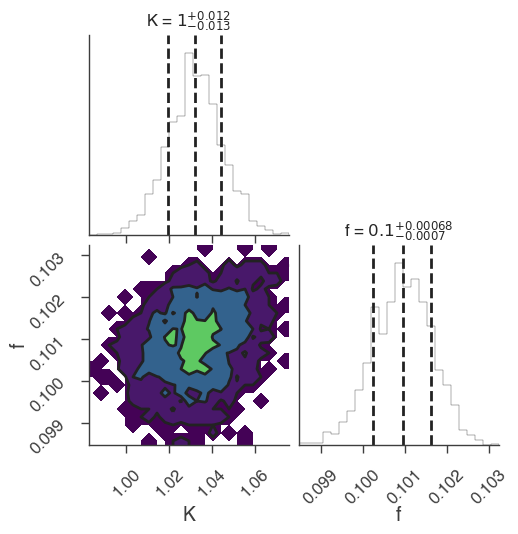

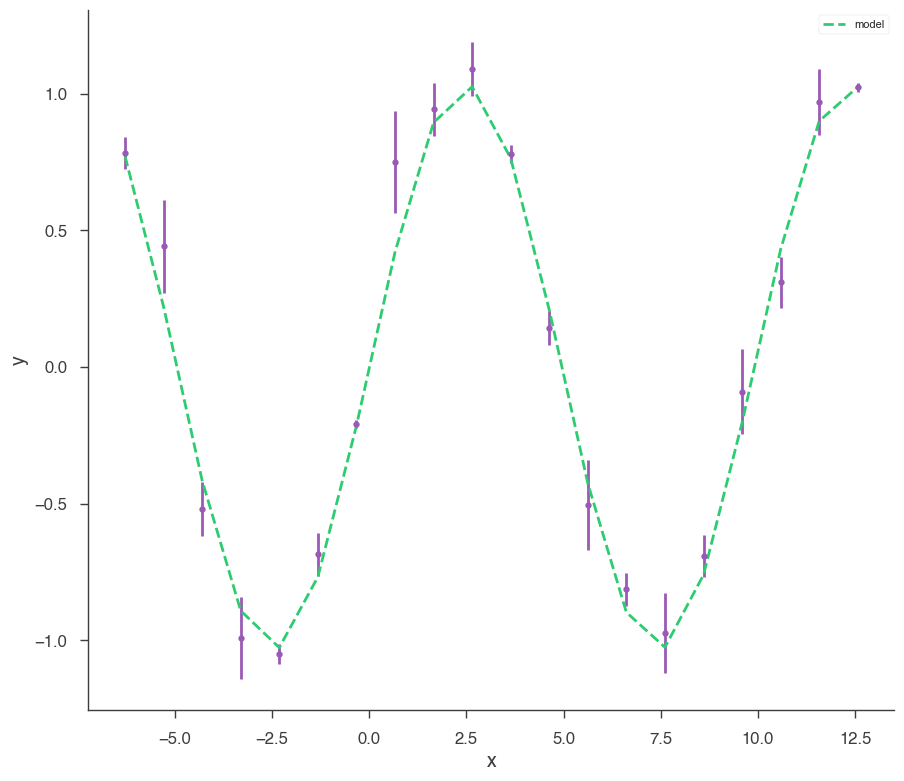

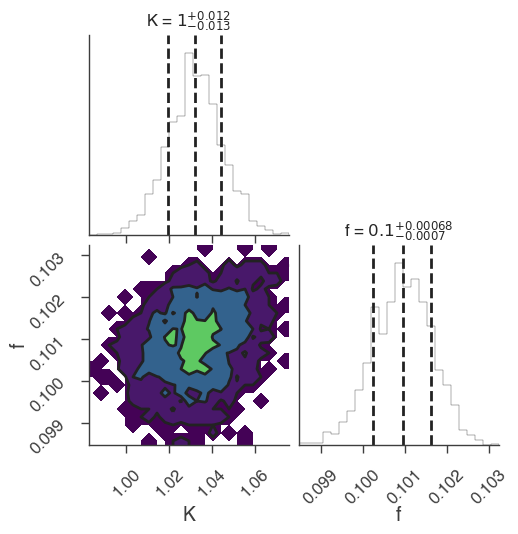

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

         INFO      sampler set to dynesty_dynamic                                          ]8;id=640275;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=911550;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

191it [00:00, 1906.15it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 239 | eff(%): 25.846 | loglstar:   -inf < -6261.628 <    inf | logz: -6268.396 +/-  0.112 | dlogz: 6235.787 >  0.010]

382it [00:00, 1898.64it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 583 | eff(%): 35.272 | loglstar:   -inf < -3954.051 <    inf | logz: -3961.659 +/-  0.122 | dlogz: 3931.352 >  0.010]

572it [00:00, 1704.70it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1112 | eff(%): 35.484 | loglstar:   -inf < -2988.870 <    inf | logz: -2996.842 +/-  0.124 | dlogz: 2973.036 >  0.010]

745it [00:00, 1434.80it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 1872 | eff(%): 31.408 | loglstar:   -inf < -2522.736 <    inf | logz: -2530.210 +/-  0.119 | dlogz: 2503.921 >  0.010]

895it [00:00, 1292.98it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2789 | eff(%): 27.212 | loglstar:   -inf < -2240.247 <    inf | logz: -2248.810 +/-  0.127 | dlogz: 2235.816 >  0.010] 

1029it [00:00, 1233.35it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 3630 | eff(%): 24.915 | loglstar:   -inf < -2050.502 <    inf | logz: -2058.881 +/-  0.125 | dlogz: 2048.105 >  0.010]

1155it [00:00, 1043.35it/s, batch: 0 | bound: 0 | nc: 35 | ncall: 4773 | eff(%): 21.904 | loglstar:   -inf < -1803.769 <    inf | logz: -1812.731 +/-  0.130 | dlogz: 1802.416 >  0.010]

1265it [00:01, 878.48it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 6118 | eff(%): 19.115 | loglstar:   -inf < -1601.969 <    inf | logz: -1610.239 +/-  0.125 | dlogz: 1599.978 >  0.010]  

1359it [00:01, 710.90it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 7493 | eff(%): 17.002 | loglstar:   -inf < -1461.800 <    inf | logz: -1470.963 +/-  0.127 | dlogz: 1461.071 >  0.010]

1438it [00:01, 638.24it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 8886 | eff(%): 15.321 | loglstar:   -inf < -1322.739 <    inf | logz: -1332.505 +/-  0.139 | dlogz: 1326.104 >  0.010]

1507it [00:01, 585.81it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 10131 | eff(%): 14.176 | loglstar:   -inf < -1023.167 <    inf | logz: -1032.791 +/-  0.134 | dlogz: 1023.060 >  0.010]

1569it [00:01, 530.85it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 11372 | eff(%): 13.216 | loglstar:   -inf < -860.103 <    inf | logz: -869.167 +/-  0.134 | dlogz: 858.778 >  0.010]    

1624it [00:01, 462.21it/s, batch: 0 | bound: 0 | nc: 42 | ncall: 12854 | eff(%): 12.161 | loglstar:   -inf < -700.432 <    inf | logz: -710.064 +/-  0.135 | dlogz: 699.989 >  0.010]

1672it [00:02, 400.74it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 14330 | eff(%): 11.274 | loglstar:   -inf < -598.725 <    inf | logz: -608.971 +/-  0.143 | dlogz: 603.611 >  0.010]

1714it [00:02, 362.14it/s, batch: 0 | bound: 0 | nc: 130 | ncall: 15813 | eff(%): 10.507 | loglstar:   -inf < -535.381 <    inf | logz: -544.633 +/-  0.129 | dlogz: 533.517 >  0.010]

1751it [00:02, 338.00it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 16898 | eff(%): 10.064 | loglstar:   -inf < -477.419 <    inf | logz: -487.139 +/-  0.135 | dlogz: 476.511 >  0.010] 

1785it [00:02, 297.21it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17098 | eff(%): 10.143 | loglstar:   -inf < -441.775 <    inf | logz: -451.478 +/-  0.134 | dlogz: 440.735 >  0.010] 

2020it [00:02, 731.25it/s, batch: 0 | bound: 1 | nc: 6 | ncall: 17552 | eff(%): 11.190 | loglstar:   -inf < -250.190 <    inf | logz: -260.138 +/-  0.132 | dlogz: 248.621 >  0.010]

2115it [00:02, 651.30it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17805 | eff(%): 11.554 | loglstar:   -inf < -196.276 <    inf | logz: -206.420 +/-  0.137 | dlogz: 194.828 >  0.010]

2300it [00:02, 910.35it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18158 | eff(%): 12.327 | loglstar:   -inf < -134.703 <    inf | logz: -143.602 +/-  0.127 | dlogz: 131.192 >  0.010]

2451it [00:03, 1051.26it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 18551 | eff(%): 12.865 | loglstar:   -inf < -101.444 <    inf | logz: -110.633 +/-  0.129 | dlogz: 97.921 >  0.010]

2574it [00:03, 884.19it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 18800 | eff(%): 13.337 | loglstar:   -inf < -79.687 <    inf | logz: -89.213 +/-  0.131 | dlogz: 76.272 >  0.010]   

2737it [00:03, 1051.52it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19185 | eff(%): 13.904 | loglstar:   -inf < -58.615 <    inf | logz: -67.925 +/-  0.129 | dlogz: 54.583 >  0.010]

2860it [00:03, 927.86it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19441 | eff(%): 14.342 | loglstar:   -inf < -47.654 <    inf | logz: -57.064 +/-  0.131 | dlogz: 43.465 >  0.010] 

3044it [00:03, 1133.55it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19799 | eff(%): 14.996 | loglstar:   -inf < -34.497 <    inf | logz: -43.715 +/-  0.129 | dlogz: 29.712 >  0.010]

3174it [00:03, 969.67it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20091 | eff(%): 15.415 | loglstar:   -inf < -28.352 <    inf | logz: -37.782 +/-  0.129 | dlogz: 23.546 >  0.010] 

3381it [00:03, 1215.92it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20433 | eff(%): 16.152 | loglstar:   -inf < -20.873 <    inf | logz: -30.383 +/-  0.130 | dlogz: 15.721 >  0.010]

3522it [00:04, 1235.53it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20807 | eff(%): 16.530 | loglstar:   -inf < -17.257 <    inf | logz: -26.670 +/-  0.131 | dlogz: 11.716 >  0.010]

3659it [00:04, 1027.37it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20987 | eff(%): 17.029 | loglstar:   -inf < -14.951 <    inf | logz: -24.230 +/-  0.129 | dlogz:  8.996 >  0.010]

3818it [00:04, 1154.13it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21303 | eff(%): 17.511 | loglstar:   -inf < -13.040 <    inf | logz: -22.284 +/-  0.129 | dlogz:  6.729 >  0.010]

3948it [00:04, 955.58it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21591 | eff(%): 17.872 | loglstar:   -inf < -11.890 <    inf | logz: -21.125 +/-  0.128 | dlogz:  5.321 >  0.010] 

4152it [00:04, 1192.87it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21892 | eff(%): 18.542 | loglstar:   -inf < -10.593 <    inf | logz: -19.812 +/-  0.128 | dlogz:  3.634 >  0.010]

4338it [00:04, 1351.01it/s, batch: 0 | bound: 7 | nc: 4 | ncall: 22307 | eff(%): 19.020 | loglstar:   -inf < -9.716 <    inf | logz: -19.009 +/-  0.128 | dlogz:  2.516 >  0.010] 

4491it [00:04, 1190.21it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22514 | eff(%): 19.514 | loglstar:   -inf < -9.211 <    inf | logz: -18.510 +/-  0.129 | dlogz:  1.805 >  0.010]

4678it [00:05, 1350.45it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22877 | eff(%): 20.011 | loglstar:   -inf < -8.827 <    inf | logz: -18.083 +/-  0.129 | dlogz:  1.188 >  0.010]

4828it [00:05, 1143.29it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23152 | eff(%): 20.413 | loglstar:   -inf < -8.581 <    inf | logz: -17.844 +/-  0.129 | dlogz:  0.846 >  0.010]

5032it [00:05, 1347.54it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23463 | eff(%): 20.999 | loglstar:   -inf < -8.360 <    inf | logz: -17.616 +/-  0.129 | dlogz:  0.533 >  0.010]

5194it [00:05, 1111.53it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23814 | eff(%): 21.362 | loglstar:   -inf < -8.240 <    inf | logz: -17.492 +/-  0.129 | dlogz:  0.371 >  0.010]

5452it [00:05, 1428.17it/s, batch: 0 | bound: 10 | nc: 5 | ncall: 24189 | eff(%): 22.083 | loglstar:   -inf < -8.104 <    inf | logz: -17.360 +/-  0.129 | dlogz:  0.211 >  0.010]

5620it [00:05, 1480.92it/s, batch: 0 | bound: 10 | nc: 4 | ncall: 24546 | eff(%): 22.439 | loglstar:   -inf < -8.050 <    inf | logz: -17.305 +/-  0.129 | dlogz:  0.148 >  0.010]

5787it [00:05, 1249.59it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24761 | eff(%): 22.909 | loglstar:   -inf < -8.011 <    inf | logz: -17.265 +/-  0.129 | dlogz:  0.104 >  0.010]

5980it [00:05, 1402.56it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25085 | eff(%): 23.373 | loglstar:   -inf < -7.982 <    inf | logz: -17.233 +/-  0.129 | dlogz:  0.070 >  0.010]

6138it [00:06, 1165.66it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25384 | eff(%): 23.713 | loglstar:   -inf < -7.963 <    inf | logz: -17.215 +/-  0.129 | dlogz:  0.050 >  0.010]

6356it [00:06, 1387.45it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25694 | eff(%): 24.265 | loglstar:   -inf < -7.947 <    inf | logz: -17.198 +/-  0.129 | dlogz:  0.032 >  0.010]

6527it [00:06, 1463.00it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 26064 | eff(%): 24.571 | loglstar:   -inf < -7.938 <    inf | logz: -17.189 +/-  0.129 | dlogz:  0.023 >  0.010]

6690it [00:06, 1166.48it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26294 | eff(%): 24.968 | loglstar:   -inf < -7.932 <    inf | logz: -17.182 +/-  0.129 | dlogz:  0.016 >  0.010]

6877it [00:06, 1319.66it/s, batch: 0 | bound: 13 | nc: 5 | ncall: 26634 | eff(%): 25.345 | loglstar:   -inf < -7.927 <    inf | logz: -17.177 +/-  0.129 | dlogz:  0.011 >  0.010]

7353it [00:06, 2140.31it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27188 | eff(%): 26.961 | loglstar:   -inf < -7.916 <    inf | logz: -17.168 +/-  0.129 | dlogz:  0.002 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7602it [00:07, 855.08it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27487 | eff(%): 27.131 | loglstar: -9.719 < -9.215 < -8.420 | logz: -17.166 +/-  0.132 | stop:  1.677]            

7800it [00:07, 991.94it/s, batch: 1 | bound: 2 | nc: 6 | ncall: 27817 | eff(%): 27.513 | loglstar: -9.719 < -8.791 < -8.420 | logz: -17.166 +/-  0.132 | stop:  1.677]

7989it [00:07, 929.91it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28147 | eff(%): 27.856 | loglstar: -9.719 < -8.546 < -8.420 | logz: -17.166 +/-  0.132 | stop:  1.677]

8490it [00:07, 1538.73it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 28736 | eff(%): 29.422 | loglstar: -9.719 < -8.016 < -8.420 | logz: -17.166 +/-  0.132 | stop:  1.677]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8749it [00:08, 733.70it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29025 | eff(%): 29.635 | loglstar: -10.148 < -9.536 < -9.717 | logz: -17.175 +/-  0.108 | stop:  1.118]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9202it [00:09, 730.74it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29523 | eff(%): 31.169 | loglstar: -10.148 < -7.921 < -9.717 | logz: -17.175 +/-  0.108 | stop:  0.961]

9202it [00:09, 970.87it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29523 | eff(%): 31.169 | loglstar: -10.148 < -7.921 < -9.717 | logz: -17.175 +/-  0.108 | stop:  0.961]

19:57:10 INFO      fit restored to maximum of posterior                                         ]8;id=908659;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=884918;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=163566;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=601802;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.031 -0.012 +0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.009 +/- 0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.945843
total,-7.945843


Values of statistical measures:

,statistical measures
AIC,20.597568
BIC,21.883150
DIC,19.861765
PDIC,1.980813
log(Z),-7.459311


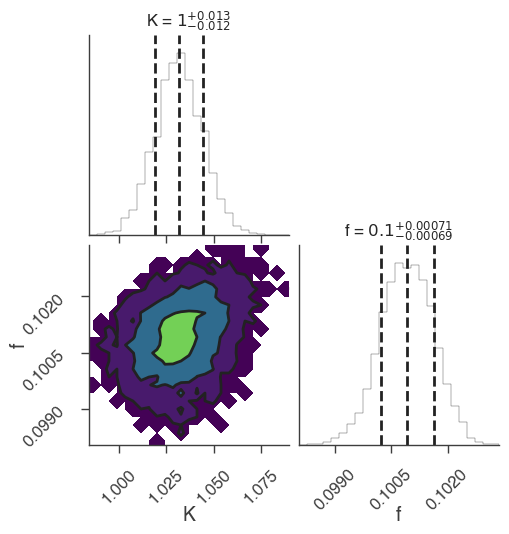

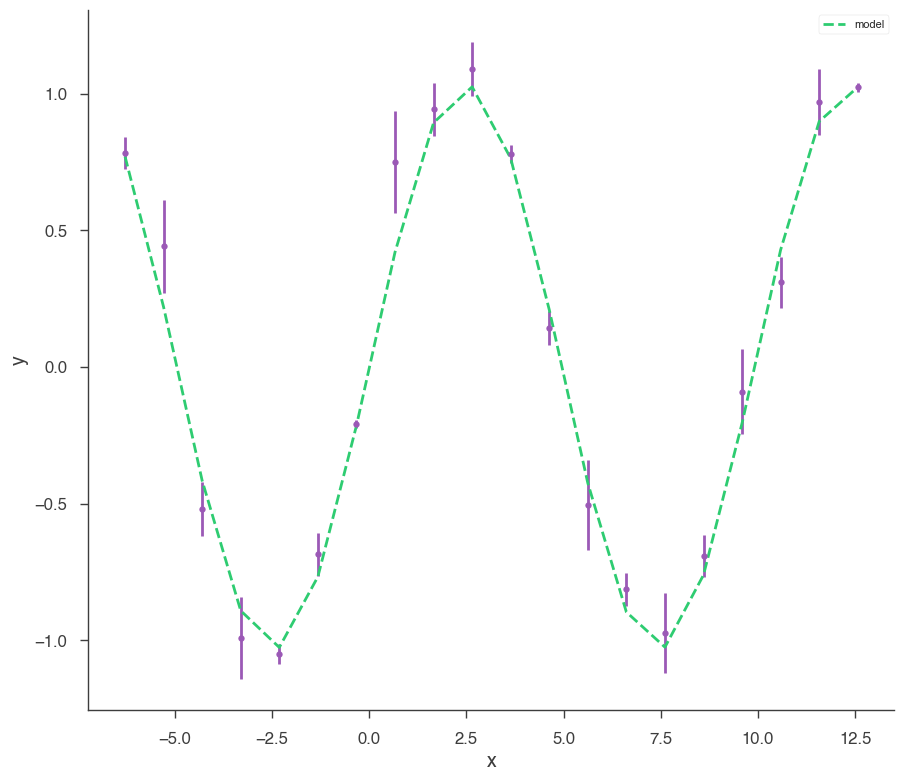

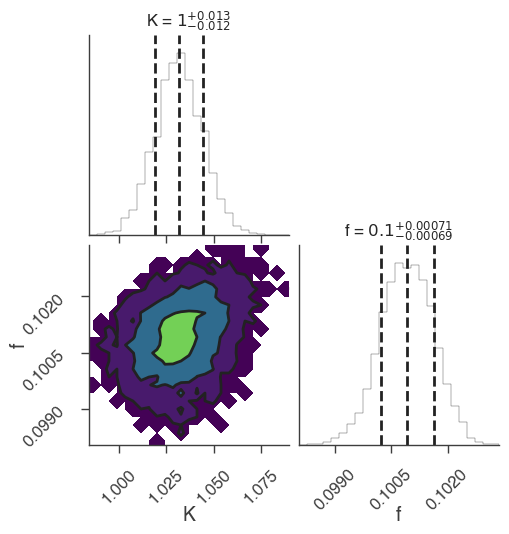

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

19:57:11 INFO      sampler set to zeus                                                     ]8;id=257253;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=870995;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:12, 51.19it/s]

Sampling progress :   2%|▏         | 13/625 [00:00<00:10, 57.99it/s]

Sampling progress :   3%|▎         | 21/625 [00:00<00:09, 66.28it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:08, 66.98it/s]

Sampling progress :   6%|▌         | 36/625 [00:00<00:08, 70.27it/s]

Sampling progress :   7%|▋         | 44/625 [00:00<00:08, 70.58it/s]

Sampling progress :   8%|▊         | 52/625 [00:00<00:07, 71.63it/s]

Sampling progress :  10%|▉         | 60/625 [00:00<00:07, 72.31it/s]

Sampling progress :  11%|█         | 68/625 [00:00<00:07, 71.76it/s]

Sampling progress :  12%|█▏        | 76/625 [00:01<00:07, 73.21it/s]

Sampling progress :  14%|█▎        | 85/625 [00:01<00:07, 76.11it/s]

Sampling progress :  15%|█▍        | 93/625 [00:01<00:07, 72.26it/s]

Sampling progress :  16%|█▌        | 101/625 [00:01<00:07, 72.70it/s]

Sampling progress :  17%|█▋        | 109/625 [00:01<00:07, 73.48it/s]

Sampling progress :  19%|█▊        | 117/625 [00:01<00:06, 73.39it/s]

Sampling progress :  20%|██        | 125/625 [00:01<00:06, 73.91it/s]

Sampling progress :  21%|██▏       | 133/625 [00:01<00:06, 74.14it/s]

Sampling progress :  23%|██▎       | 141/625 [00:01<00:06, 74.59it/s]

Sampling progress :  24%|██▍       | 149/625 [00:02<00:06, 74.81it/s]

Sampling progress :  25%|██▌       | 157/625 [00:02<00:06, 75.03it/s]

Sampling progress :  26%|██▋       | 165/625 [00:02<00:06, 74.54it/s]

Sampling progress :  28%|██▊       | 173/625 [00:02<00:05, 75.60it/s]

Sampling progress :  29%|██▉       | 181/625 [00:02<00:05, 76.33it/s]

Sampling progress :  30%|███       | 189/625 [00:02<00:05, 76.71it/s]

Sampling progress :  32%|███▏      | 197/625 [00:02<00:05, 76.78it/s]

Sampling progress :  33%|███▎      | 206/625 [00:02<00:05, 78.77it/s]

Sampling progress :  34%|███▍      | 214/625 [00:02<00:05, 78.19it/s]

Sampling progress :  36%|███▌      | 222/625 [00:03<00:05, 77.77it/s]

Sampling progress :  37%|███▋      | 230/625 [00:03<00:05, 75.30it/s]

Sampling progress :  38%|███▊      | 238/625 [00:03<00:05, 74.86it/s]

Sampling progress :  39%|███▉      | 246/625 [00:03<00:05, 72.94it/s]

Sampling progress :  41%|████      | 254/625 [00:03<00:05, 73.00it/s]

Sampling progress :  42%|████▏     | 262/625 [00:03<00:04, 72.72it/s]

Sampling progress :  43%|████▎     | 270/625 [00:03<00:04, 73.21it/s]

Sampling progress :  44%|████▍     | 278/625 [00:03<00:04, 73.98it/s]

Sampling progress :  46%|████▌     | 287/625 [00:03<00:04, 76.35it/s]

Sampling progress :  47%|████▋     | 295/625 [00:03<00:04, 77.25it/s]

Sampling progress :  48%|████▊     | 303/625 [00:04<00:04, 76.18it/s]

Sampling progress :  50%|████▉     | 311/625 [00:04<00:04, 76.77it/s]

Sampling progress :  51%|█████     | 319/625 [00:04<00:04, 76.39it/s]

Sampling progress :  52%|█████▏    | 327/625 [00:04<00:04, 73.76it/s]

Sampling progress :  54%|█████▎    | 335/625 [00:04<00:03, 72.50it/s]

Sampling progress :  55%|█████▍    | 343/625 [00:04<00:03, 73.17it/s]

Sampling progress :  56%|█████▌    | 351/625 [00:04<00:03, 74.36it/s]

Sampling progress :  58%|█████▊    | 360/625 [00:04<00:03, 76.20it/s]

Sampling progress :  59%|█████▉    | 369/625 [00:04<00:03, 78.82it/s]

Sampling progress :  60%|██████    | 377/625 [00:05<00:03, 77.75it/s]

Sampling progress :  62%|██████▏   | 385/625 [00:05<00:03, 74.69it/s]

Sampling progress :  63%|██████▎   | 393/625 [00:05<00:03, 75.79it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:05<00:02, 77.87it/s]

Sampling progress :  66%|██████▌   | 411/625 [00:05<00:02, 79.38it/s]

Sampling progress :  67%|██████▋   | 419/625 [00:05<00:02, 77.56it/s]

Sampling progress :  68%|██████▊   | 428/625 [00:05<00:02, 79.32it/s]

Sampling progress :  70%|██████▉   | 436/625 [00:05<00:02, 78.31it/s]

Sampling progress :  71%|███████   | 444/625 [00:05<00:02, 75.73it/s]

Sampling progress :  72%|███████▏  | 452/625 [00:06<00:02, 74.64it/s]

Sampling progress :  74%|███████▎  | 460/625 [00:06<00:02, 72.75it/s]

Sampling progress :  75%|███████▌  | 469/625 [00:06<00:02, 75.41it/s]

Sampling progress :  76%|███████▋  | 477/625 [00:06<00:01, 74.60it/s]

Sampling progress :  78%|███████▊  | 485/625 [00:06<00:01, 73.02it/s]

Sampling progress :  79%|███████▉  | 493/625 [00:06<00:01, 72.14it/s]

Sampling progress :  80%|████████  | 501/625 [00:06<00:01, 69.93it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:06<00:01, 69.45it/s]

Sampling progress :  83%|████████▎ | 517/625 [00:06<00:01, 70.70it/s]

Sampling progress :  84%|████████▍ | 526/625 [00:07<00:01, 74.76it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:07<00:01, 72.39it/s]

Sampling progress :  87%|████████▋ | 542/625 [00:07<00:01, 74.24it/s]

Sampling progress :  88%|████████▊ | 550/625 [00:07<00:00, 75.75it/s]

Sampling progress :  89%|████████▉ | 558/625 [00:07<00:00, 76.34it/s]

Sampling progress :  91%|█████████ | 567/625 [00:07<00:00, 79.13it/s]

Sampling progress :  92%|█████████▏| 576/625 [00:07<00:00, 79.20it/s]

Sampling progress :  93%|█████████▎| 584/625 [00:07<00:00, 79.31it/s]

Sampling progress :  95%|█████████▍| 592/625 [00:07<00:00, 77.29it/s]

Sampling progress :  96%|█████████▌| 600/625 [00:08<00:00, 76.28it/s]

Sampling progress :  97%|█████████▋| 608/625 [00:08<00:00, 75.21it/s]

Sampling progress :  99%|█████████▊| 616/625 [00:08<00:00, 73.59it/s]

Sampling progress : 100%|█████████▉| 624/625 [00:08<00:00, 73.98it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 74.42it/s]

19:57:20 INFO      fit restored to maximum of posterior                                         ]8;id=536995;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=407813;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=605099;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=597053;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 27


Scale Factor: 1.208429


Mean Integrated Autocorrelation Time: 2.96


Effective Sample Size: 4219.73


Number of Log Probability Evaluations: 65111


Effective Samples per Log Probability Evaluation: 0.064808


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.031 -0.012 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.010 -0.008 +0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.945732
total,-7.945732


Values of statistical measures:

,statistical measures
AIC,20.597347
BIC,21.882929
DIC,19.963698
PDIC,2.029904


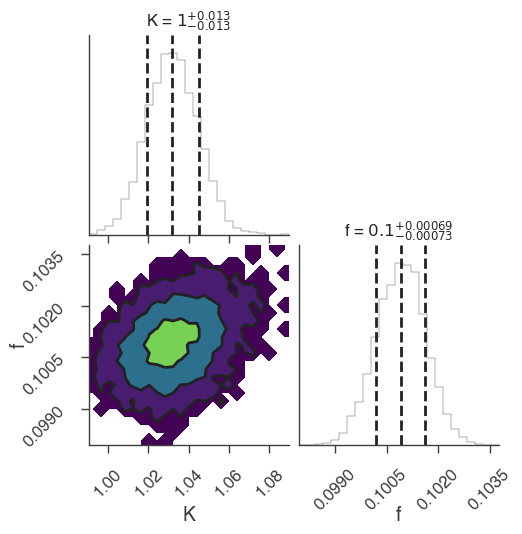

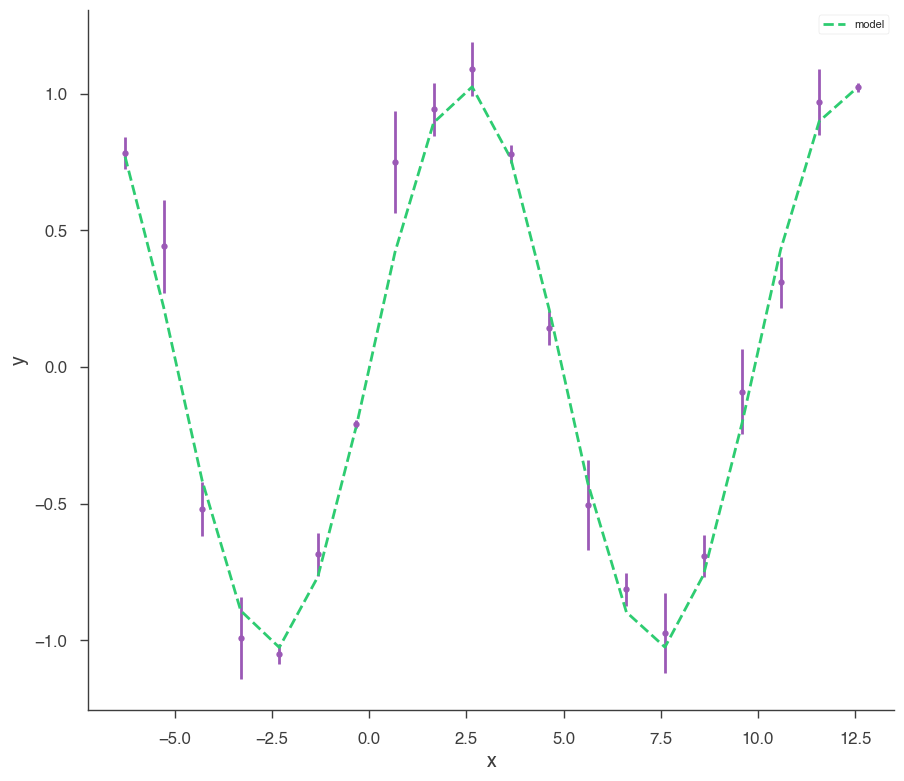

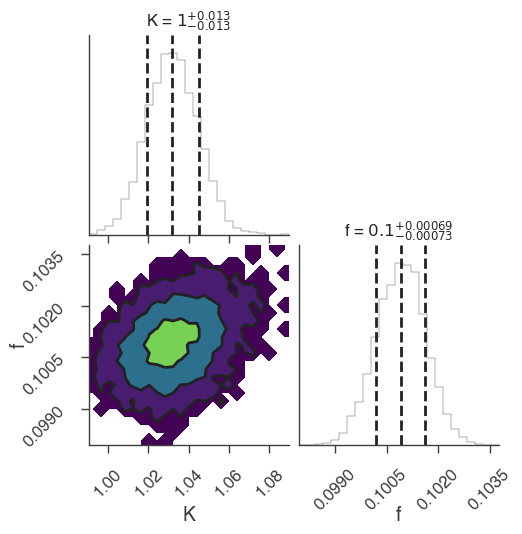

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

19:57:21 INFO      sampler set to ultranest                                                ]8;id=650311;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=190375;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-8  


[ultranest] Likelihood function evaluations: 9430


[ultranest]   logZ = -17.03 +- 0.1088


[ultranest] Effective samples strategy satisfied (ESS = 974.1, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.11 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


19:57:28 INFO      fit restored to maximum of posterior                                         ]8;id=581763;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=794437;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=314280;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=314151;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.031 -0.012 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.010 +/- 0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.946366
total,-7.946366


Values of statistical measures:

,statistical measures
AIC,20.598615
BIC,21.884197
DIC,19.945999
PDIC,2.021581
log(Z),-7.401341


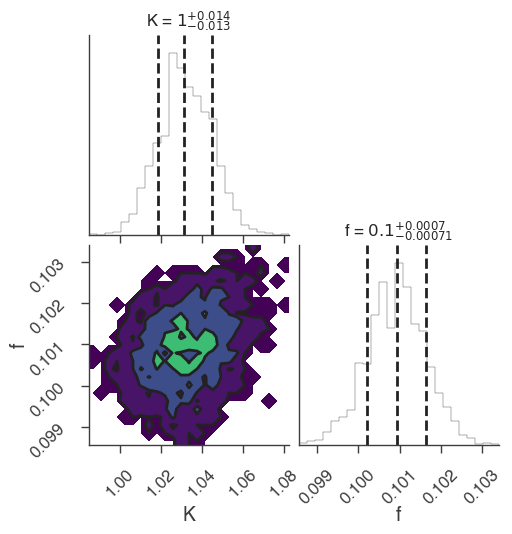

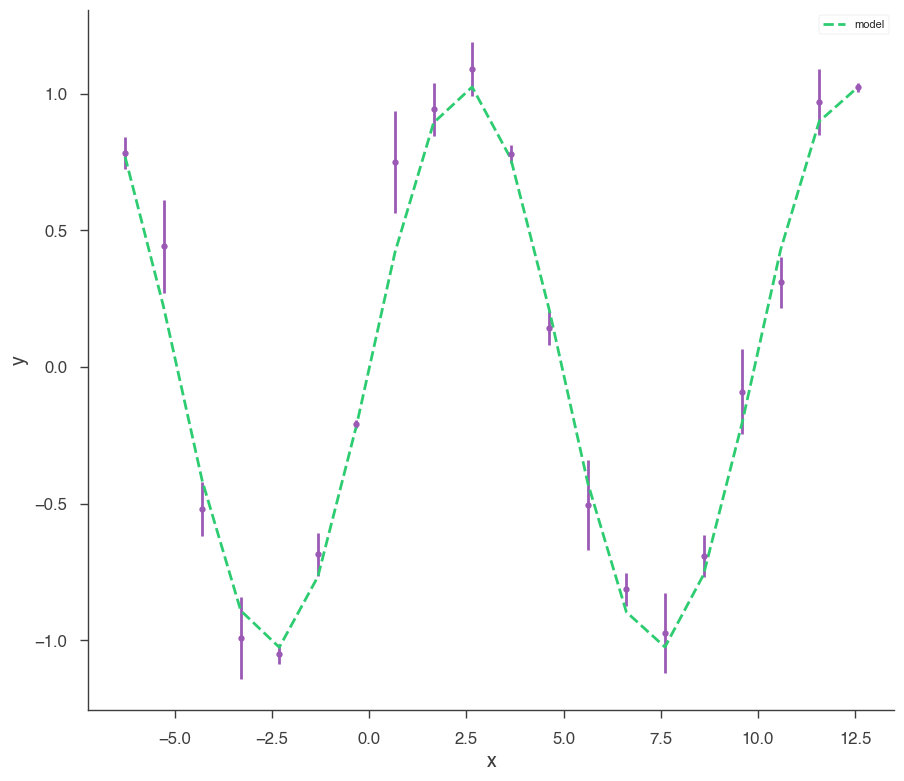

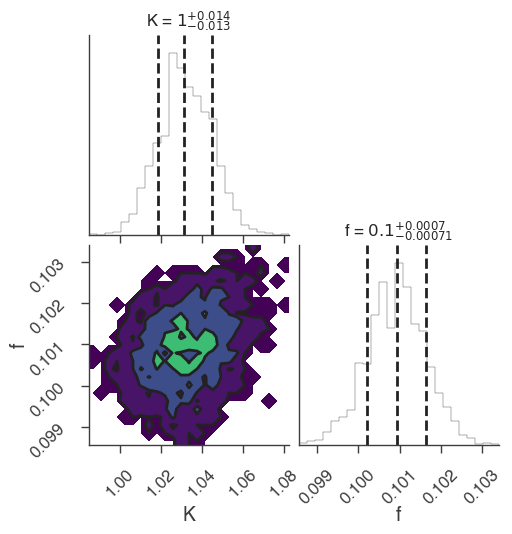

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()